In [167]:
import numpy as np
import pandas as pd
%matplotlib inline

In [168]:
df = pd.read_csv("C:/Users/thaku/Downloads/m23/time_series/Data/macrodata.csv",index_col = 0 , parse_dates = True)

In [169]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

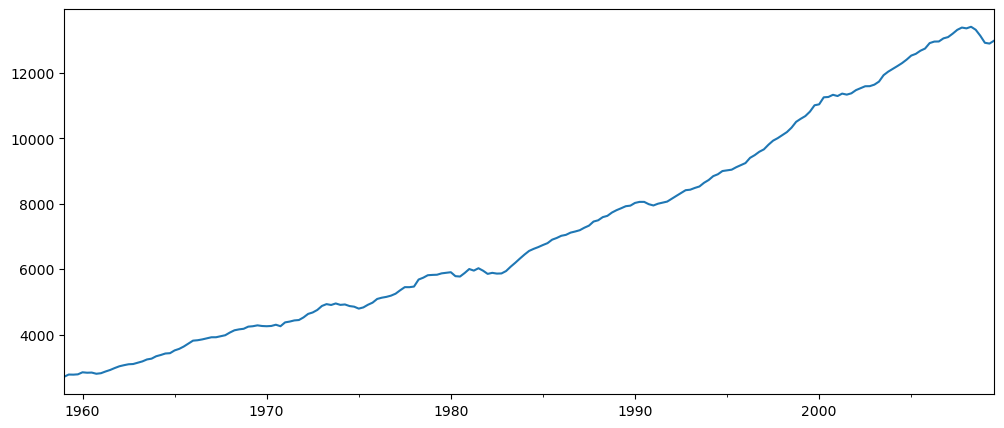

In [170]:
df['realgdp'].plot(figsize = (12,5))

In [171]:
# !pip install statsmodels

### Hodrick-Prescott (HP)

In [172]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [173]:
# we have data at the quarter level 
# based on data level there are values of lambda
#  Hodrick-Prescott (HP) helps to separate the cycle component from the trend component

In [174]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb = 1600)

In [175]:
type(gdp_trend)

pandas.core.series.Series

In [176]:
df['trend'] = gdp_trend
df['cycle'] = gdp_cycle

<Axes: >

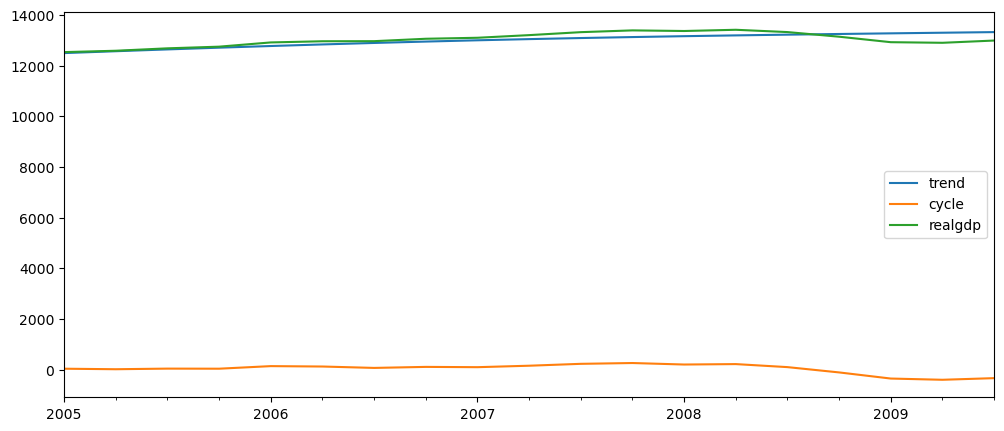

In [177]:
df[['trend','cycle','realgdp']]['2005-01-01':].plot(figsize= (12,5))

### ETS decomposition

In [178]:
df = pd.read_csv("C:/Users/thaku/Downloads/m23/time_series/Data/airline_passengers.csv",index_col = 0 , parse_dates = True)

In [179]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [180]:
df.dropna(inplace = True)
# drop the null lines since model can not be applied on the null lines

<Axes: xlabel='Month'>

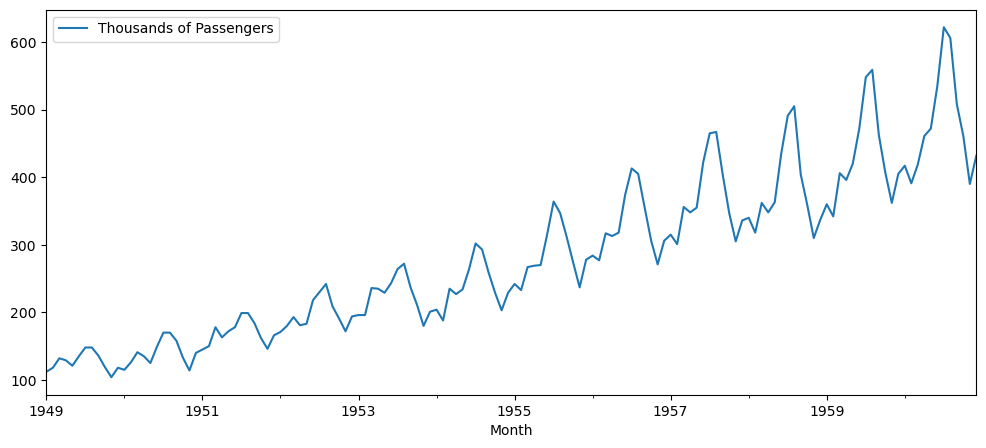

In [181]:
df.plot()

In [182]:
# data increase does not look linear may be eponential so we use the multiplicative model

In [183]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [184]:
result = seasonal_decompose(df['Thousands of Passengers'], model = 'multiplicative')

In [185]:
result

In [186]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [187]:
# initial is nan since takes some values earlier to figure out the trend

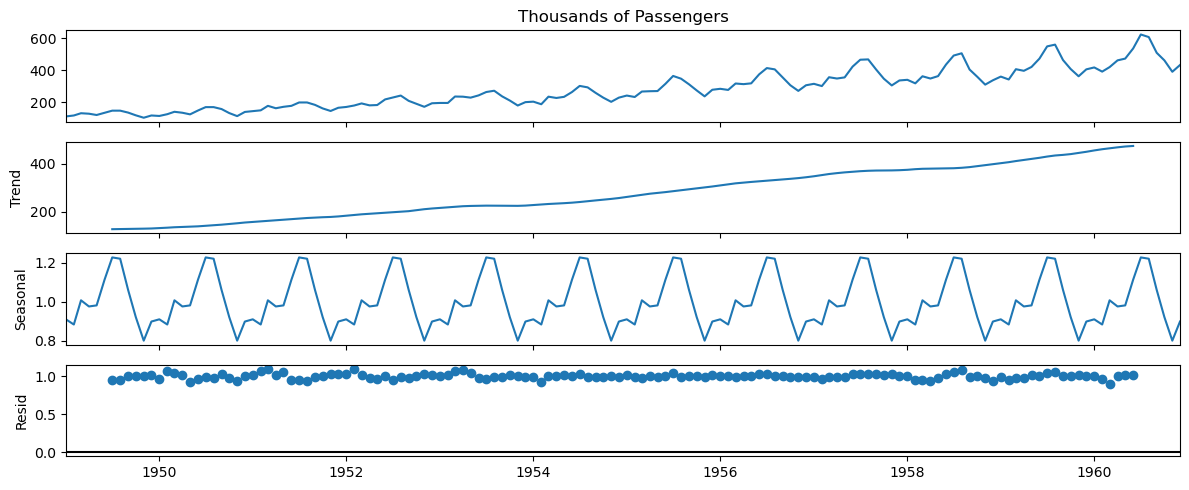

In [188]:
# by default plots are small one method to handel is to set a default sizze for notbook
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

result.plot();
# ; avoids printing twice


## first plot is the data as it is 
# second one has the general trend how the output is increasing / decreasing over time
# seasonal plot shows how there is seasonality in data if there is no tredn
## residual contains the points which are not explained by trend / seasonality

<Axes: xlabel='Month'>

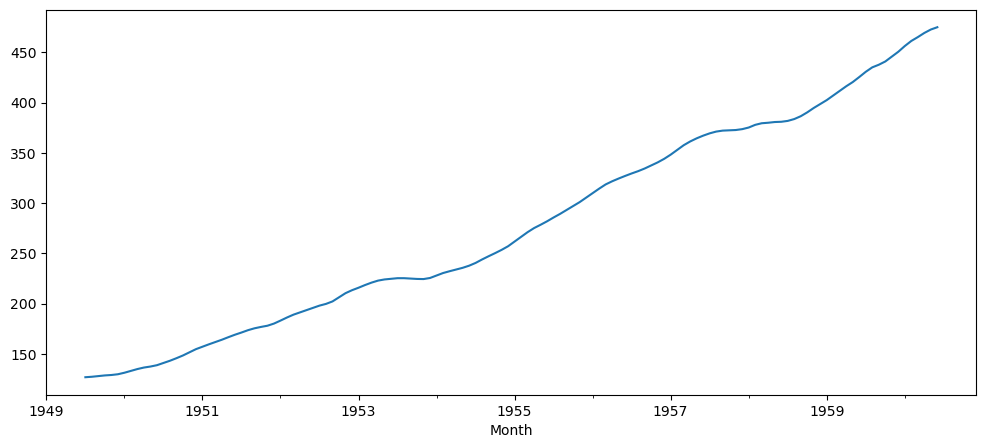

In [189]:
result.trend.plot()

### EWMA (exponentially weighted moving average)

In [190]:
##the recent data has more importance compared to the older data

In [191]:
## 6 month avg
## per month data we have so we take window 6
df['6 month sma']= df['Thousands of Passengers'].rolling(window = 6).mean()

In [192]:
df['12 month sma']= df['Thousands of Passengers'].rolling(window = 12).mean()

<Axes: xlabel='Month'>

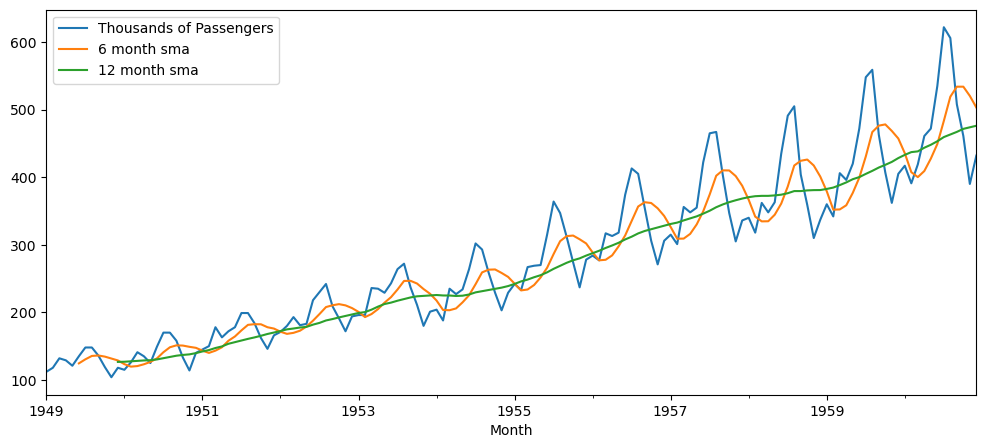

In [193]:
df.plot(figsize = (12,5))

In [194]:
df['EWMA-12']= df['Thousands of Passengers'].ewm(span = 12).mean()
# we want to consider 1 year span to caludate ewma so we pass 12 and based on this algo would be calulcating w internally

<Axes: xlabel='Month'>

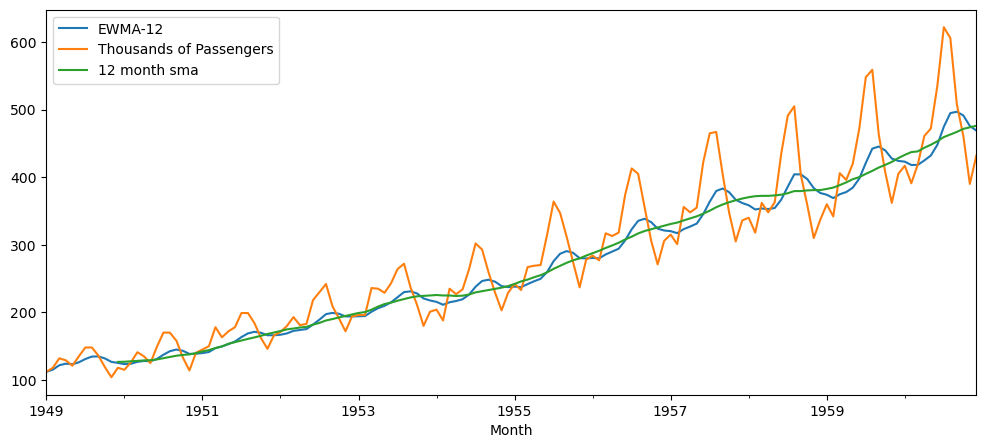

In [195]:
df[['EWMA-12','Thousands of Passengers','12 month sma']].plot(figsize = (12,5))

In [196]:
airline1 = pd.read_csv("C:/Users/thaku/Downloads/m23/time_series/Data/airline_passengers.csv",index_col = 0 , parse_dates = True)

In [197]:
airline1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [198]:
# by default there is no frequency assigned to a dataframe but in reality if we observe our data the 
# date field is the start of each month 
# use offsets here 
# ms

In [199]:
airline1.index .freq = 'MS'

In [200]:
airline1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [201]:
## same results as pandas EWM

In [202]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [203]:
span = 12
alpha = 2/(span+1)

In [204]:
airline1['EWMA12'] = airline1['Thousands of Passengers'].ewm(alpha = alpha , adjust = False).mean()

In [205]:
airline1.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [206]:
model = SimpleExpSmoothing(airline1['Thousands of Passengers'])
# while fitting this model index should have frequency

In [207]:
fitted_model = model.fit(smoothing_level = alpha,optimized = False)

In [208]:
fitted_model.fittedvalues 
# there is an issue here 
# compared to the expsmoothing the values are shifted by one value down since
# value at first place repeating twice
## need to shift one ip
airline1['ses'] = fitted_model.fittedvalues.shift(-1)

In [209]:
airline1.head()

,Thousands of Passengers,EWMA12,ses
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [210]:
# ewma and ses are exact same 

<Axes: xlabel='Month'>

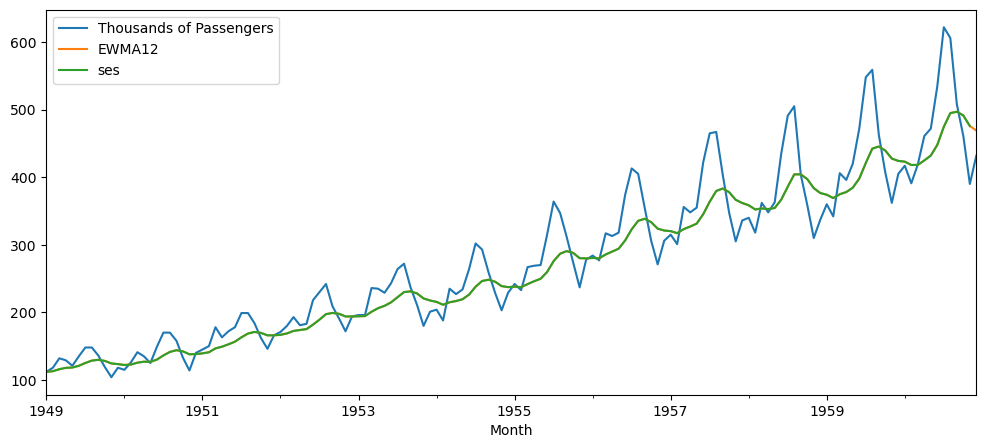

In [212]:
airline1.plot()

In [213]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [216]:
airline1['DES_add_12'] = ExponentialSmoothing(airline1['Thousands of Passengers'],trend = 'add').fit().fittedvalues.shift(-1)
# additive or multiplicative based on the data 
## try both and see which fits the data better

In [217]:
airline1.columns

Index(['Thousands of Passengers', 'EWMA12', 'ses', 'DES_add_12'], dtype='object')

<Axes: xlabel='Month'>

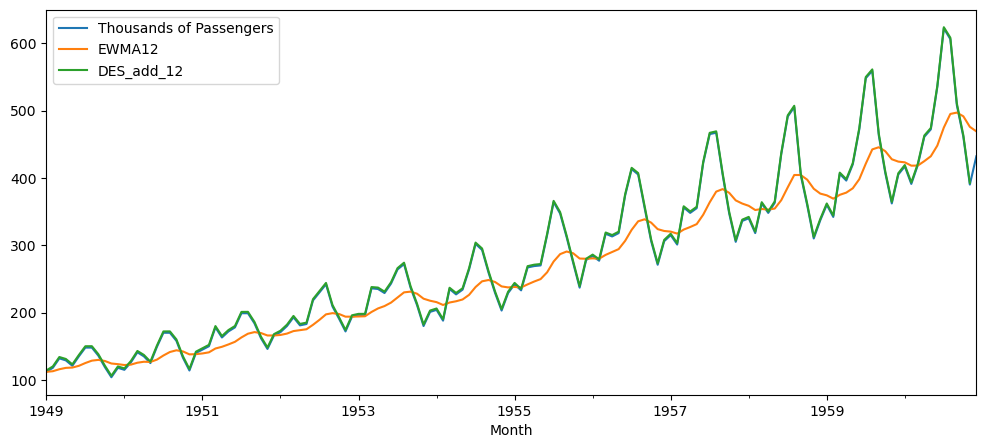

In [218]:
airline1[['Thousands of Passengers', 'EWMA12', 'DES_add_12']].plot()

<Axes: xlabel='Month'>

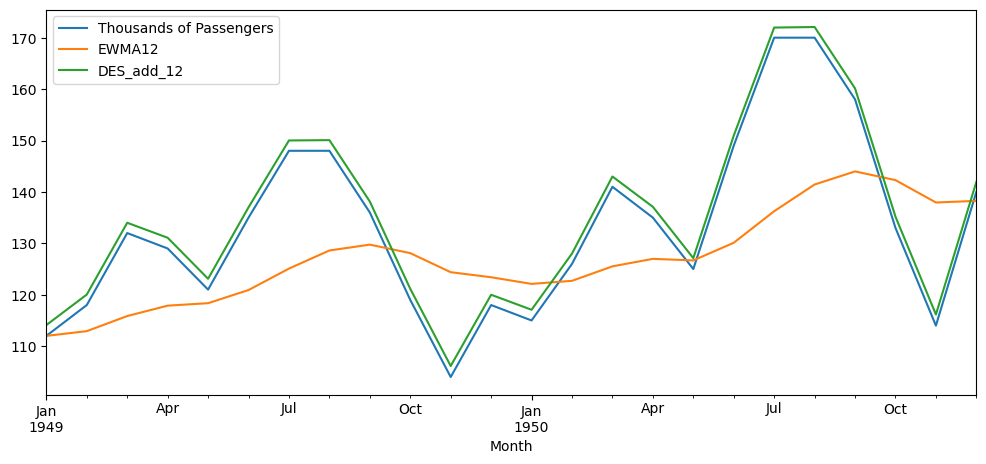

In [219]:
## first 2 years
airline1[['Thousands of Passengers', 'EWMA12', 'DES_add_12']].iloc[:24].plot()

In [220]:
## trying with multiplicative model
airline1['DES_mul_12'] = ExponentialSmoothing(airline1['Thousands of Passengers'],trend = 'mul').fit().fittedvalues.shift(-1)

In [221]:
airline1.columns

Index(['Thousands of Passengers', 'EWMA12', 'ses', 'DES_add_12', 'DES_mul_12'], dtype='object')

<Axes: xlabel='Month'>

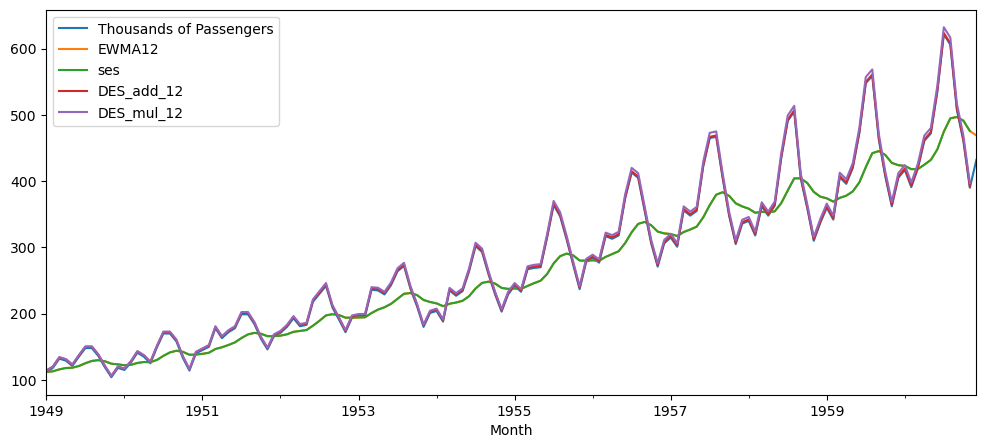

In [223]:
airline1[['Thousands of Passengers', 'EWMA12', 'ses', 'DES_add_12', 'DES_mul_12']].plot()

<Axes: xlabel='Month'>

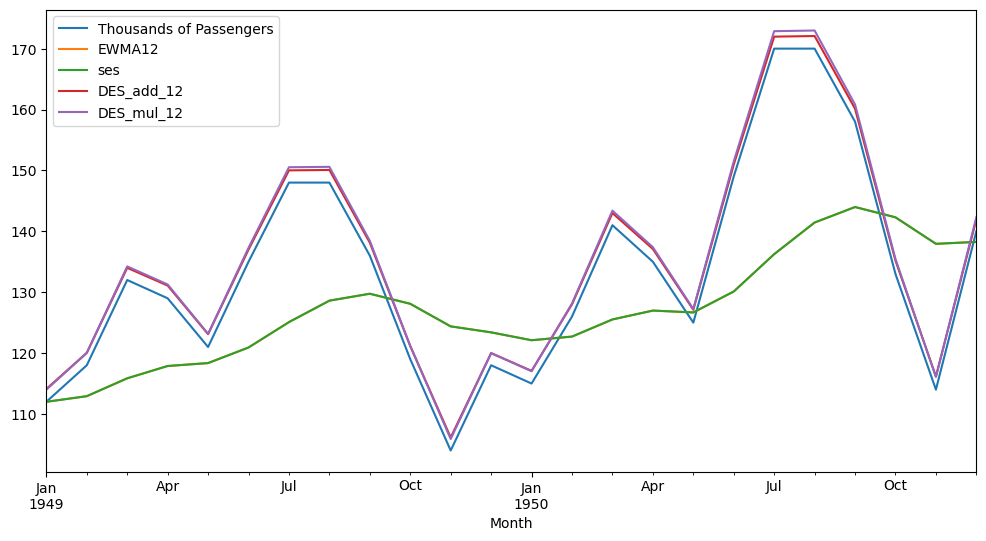

In [228]:
airline1[['Thousands of Passengers', 'EWMA12', 'ses', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize = (12,6))

<Axes: xlabel='Month'>

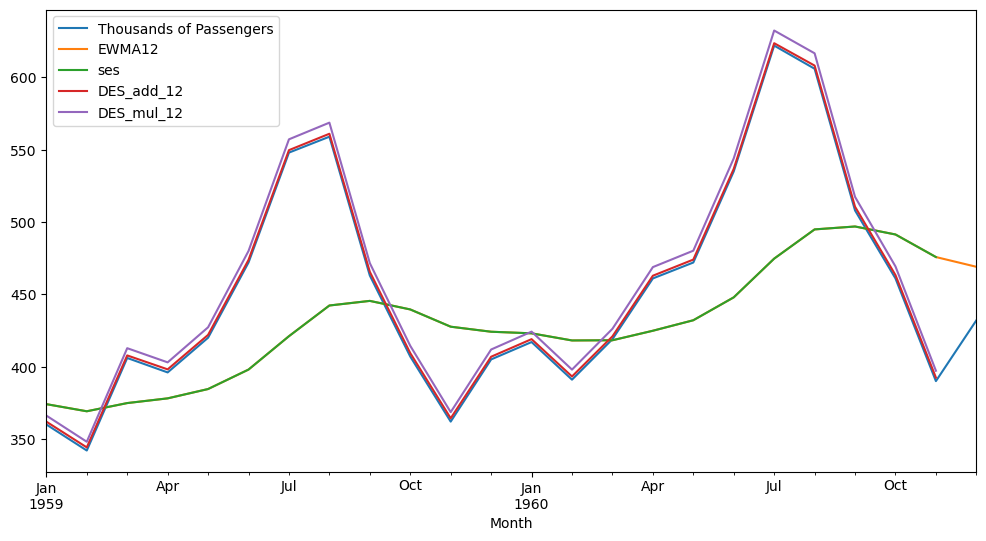

In [226]:
airline1[['Thousands of Passengers', 'EWMA12', 'ses', 'DES_add_12', 'DES_mul_12']].iloc[-24:].plot(figsize = (12,6))

### holt winters

In [231]:
airline1['hw-mul']= ExponentialSmoothing(airline1['Thousands of Passengers'], trend = 'mul', seasonal= 'mul',
                                         seasonal_periods =12).fit().fittedvalues

C:\Users\thaku\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

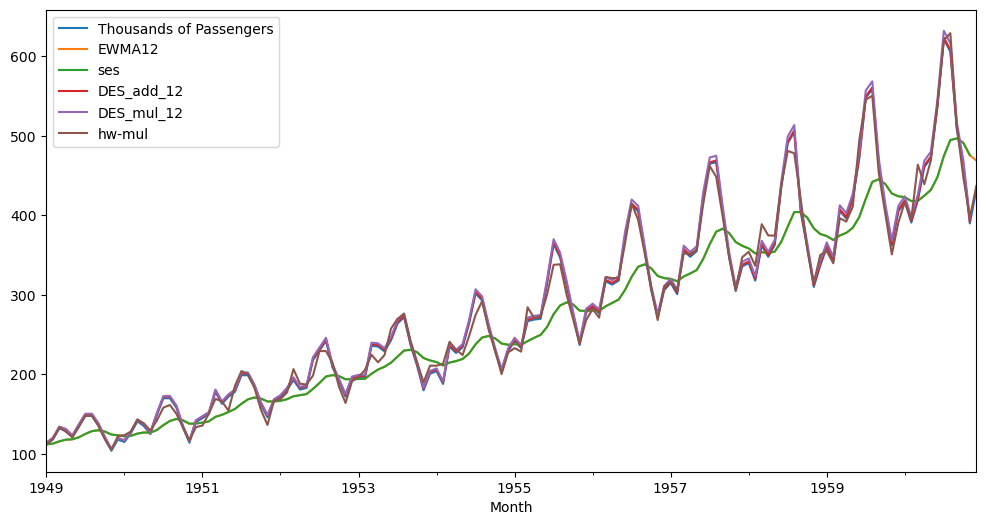

In [232]:
airline1.plot(figsize = (12,6))

<Axes: xlabel='Month'>

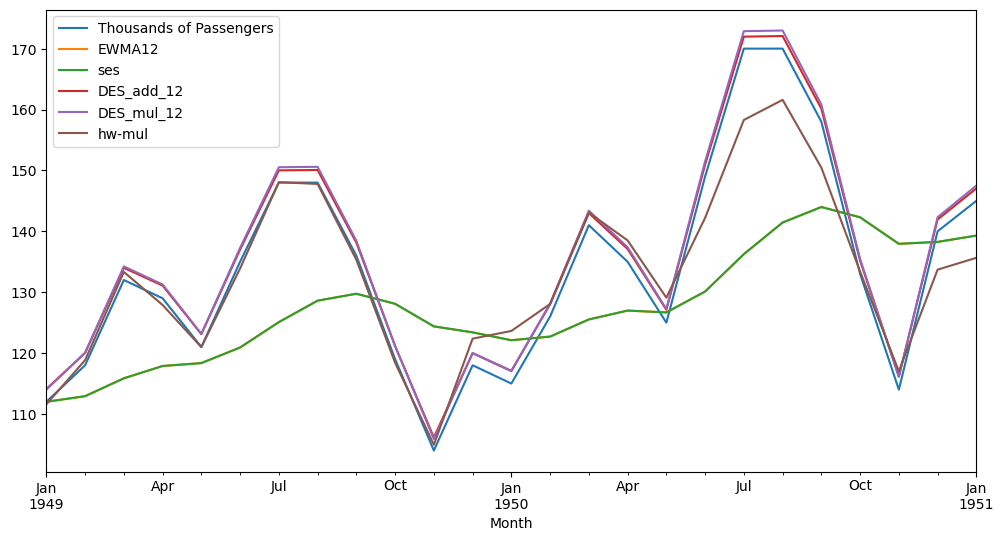

In [233]:
# seasonality : mul/ add 
# seasonal periods is the time frame as per out index datetime in which seasonality is showing up 
airline1.iloc[:25].plot(figsize = (12,6))